In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans

%matplotlib inline

from mlgrad.distance import PowerDistance
from mlgrad.gfunc import GFuncExp, GFuncPow
from mlgrad.kagg import KAgg

In [2]:
def entropy(X):
    S = 0.
    for x in X:
        if x:
            S += np.log(x)*x
    return -S

In [3]:
digits_dataset = load_digits()
data = digits_dataset.data
cls = digits_dataset.target

In [4]:
data.shape

(1797, 64)

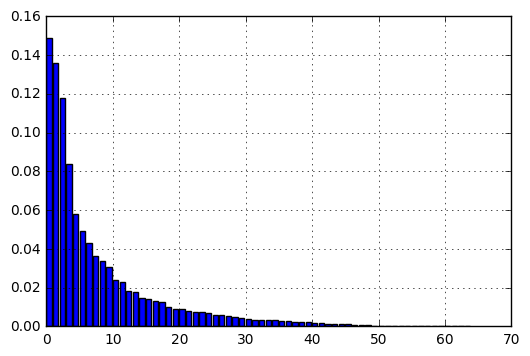

In [5]:
N = 64
pca = PCA(N)
pca.fit(data)
X = pca.transform(data)
plt.bar(range(N), pca.explained_variance_ratio_)
plt.grid(1)
plt.show()

In [6]:
dist_func = PowerDistance(2.0)
gfunc = GFuncExp(2.0, 0.5)
kagg = KAgg(dist_func, gfunc, h=0.0001, tol=1.0e-3, max_epoch=1000, ls=0)
kagg.fit(X, n_centers=10)
print('K=', kagg.state['K'])
centers = kagg.state['centers']

TypeError: __init__() takes exactly 2 positional arguments (1 given)

In [ ]:
Y = kagg.predict(X)
Z = np.argmax(Y, axis=1)

In [ ]:
M = np.zeros((10,10), dtype=np.double)
for c,z in zip(cls,Z):
    M[c,z] += 1 

cc = []
zz =[]
vals = []
for i in range(10):
    for j in range(10):
        v = M[i,j]
        if v:
            cc.append(i)
            zz.append(j)
            vals.append(v)
    
cc = np.array(cc, dtype=np.double)
zz = np.array(zz, dtype=np.double)
vals=np.array(vals, dtype=np.double)

E = []
for i in range(10):
    E.append(entropy(M[i,:]/np.sum(M[i,:])))
print(E)

In [ ]:
kmean = KMeans(10)
kmean.fit(X)
Z2 = kmean.predict(X)
print(Z2, cls)

In [ ]:
M2 = np.zeros((10,10), dtype=np.double)
for c2,z2 in zip(cls,Z2):
    M2[c2,z2] += 1 

cc2 = []
zz2 =[]
vals2 = []
for i2 in range(10):
    for j2 in range(10):
        v2 = M2[i2,j2]
        if v2:
            cc2.append(i2)
            zz2.append(j2)
            vals2.append(v2)
    
cc2 = np.array(cc2, dtype=np.double)
zz2 = np.array(zz2, dtype=np.double)
vals2=np.array(vals2, dtype=np.double)

E2 = []
for i in range(10):
    E2.append(entropy(M2[i,:]/np.sum(M2[i,:])))
print(E2)

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("kagg")
plt.scatter(cc, zz, s=4*vals, c=cc)
plt.xticks(list(range(0,10)))
plt.yticks(list(range(0,10)))
plt.xlim(-1,10)
plt.ylim(-1,10)
for i,v in enumerate(E):
    plt.text(i-0.3,-1, "%.2f" % v)
plt.subplot(1,2,2)
plt.title("kmeans")
plt.scatter(cc2, zz2, s=4*vals2, c=cc2)
plt.xticks(list(range(0,10)))
plt.yticks(list(range(0,10)))
plt.xlim(-1,10)
plt.ylim(-1,10)
for i2,v2 in enumerate(E2):
    plt.text(i2-0.3,-1, "%.2f" % v2)
plt.show()